### In this notebook I take an ideal pulse (risetime= 0) and see how the trapezoid output varies as a function of energy
 - For no noise, there is no correction needed (turn amplitude on noise contribution to zero in 2'nd cell to see this
 - For simple gaussian noise with an rms of 20, the fractional difference is also shown in cell 2

In [12]:
import numpy as np; from matplotlib.pyplot import *
from scipy.optimize import curve_fit
from scipy import signal
import time

def trap(arr,rise,top,fall):
    '''A trapezoid filter convolving function is stored in arr with parmeters rise,top,fall \n Use >> trap(arr,rise,top,fall) '''
    r,t,d = int(rise),int(top),int(fall)                                                                                                                                                                 
    length=len(arr)     
    x=np.arange(length)               
    arr[0:r]= d+x[0:r]         
    arr[r:r+t]=r                          
    arr[r+t:r+r+t]=r-d-x[0:r]
    arr[r+r+t:length] = 0
    
    
def wave(t,*pars):                  #I'M JUST GENERATING AN IDEAL WAVEFORM (RISETIME=0)
    t0,tau1=pars
    return np.heaviside(t-t0,1.)*(np.exp(-(t-t0).astype(float)/tau1))

### - Now I step over an energy range of 1 to 10,000 and generate 100 WF's for each step.
### - I determine the difference of each WF from the "true" energy
### - I take the mean of that difference over the 100 WF's generated and append it to OFF

In [14]:
fs=35
t=np.arange(3500)
rise,top,fall=300,100,1100
trp=np.zeros(len(t),dtype=float)
trap(trp,rise,top,fall)
trp=trp/(rise*fall)

w=wave(t,900,1100)
off=[]
OFF=[]
SIG=[]
steps=np.linspace(1,10000,1000)
off=np.zeros(1000,dtype=float)
beg=time.time()
for amp in steps:
    for s in range(1000):
        wf=amp*w+20*np.random.rand(len(t))
        conv=signal.fftconvolve(wf,trp)[0:len(t)]
        off[i]=np.amax(conv)-np.amax(wf)
    OFF.append(off.mean())
    SIG.append(off.std())
print(time.time()-beg)
OFF=np.array(OFF,dtype=float)
SIG=np.array(SIG,dtype=float)


368.378612995


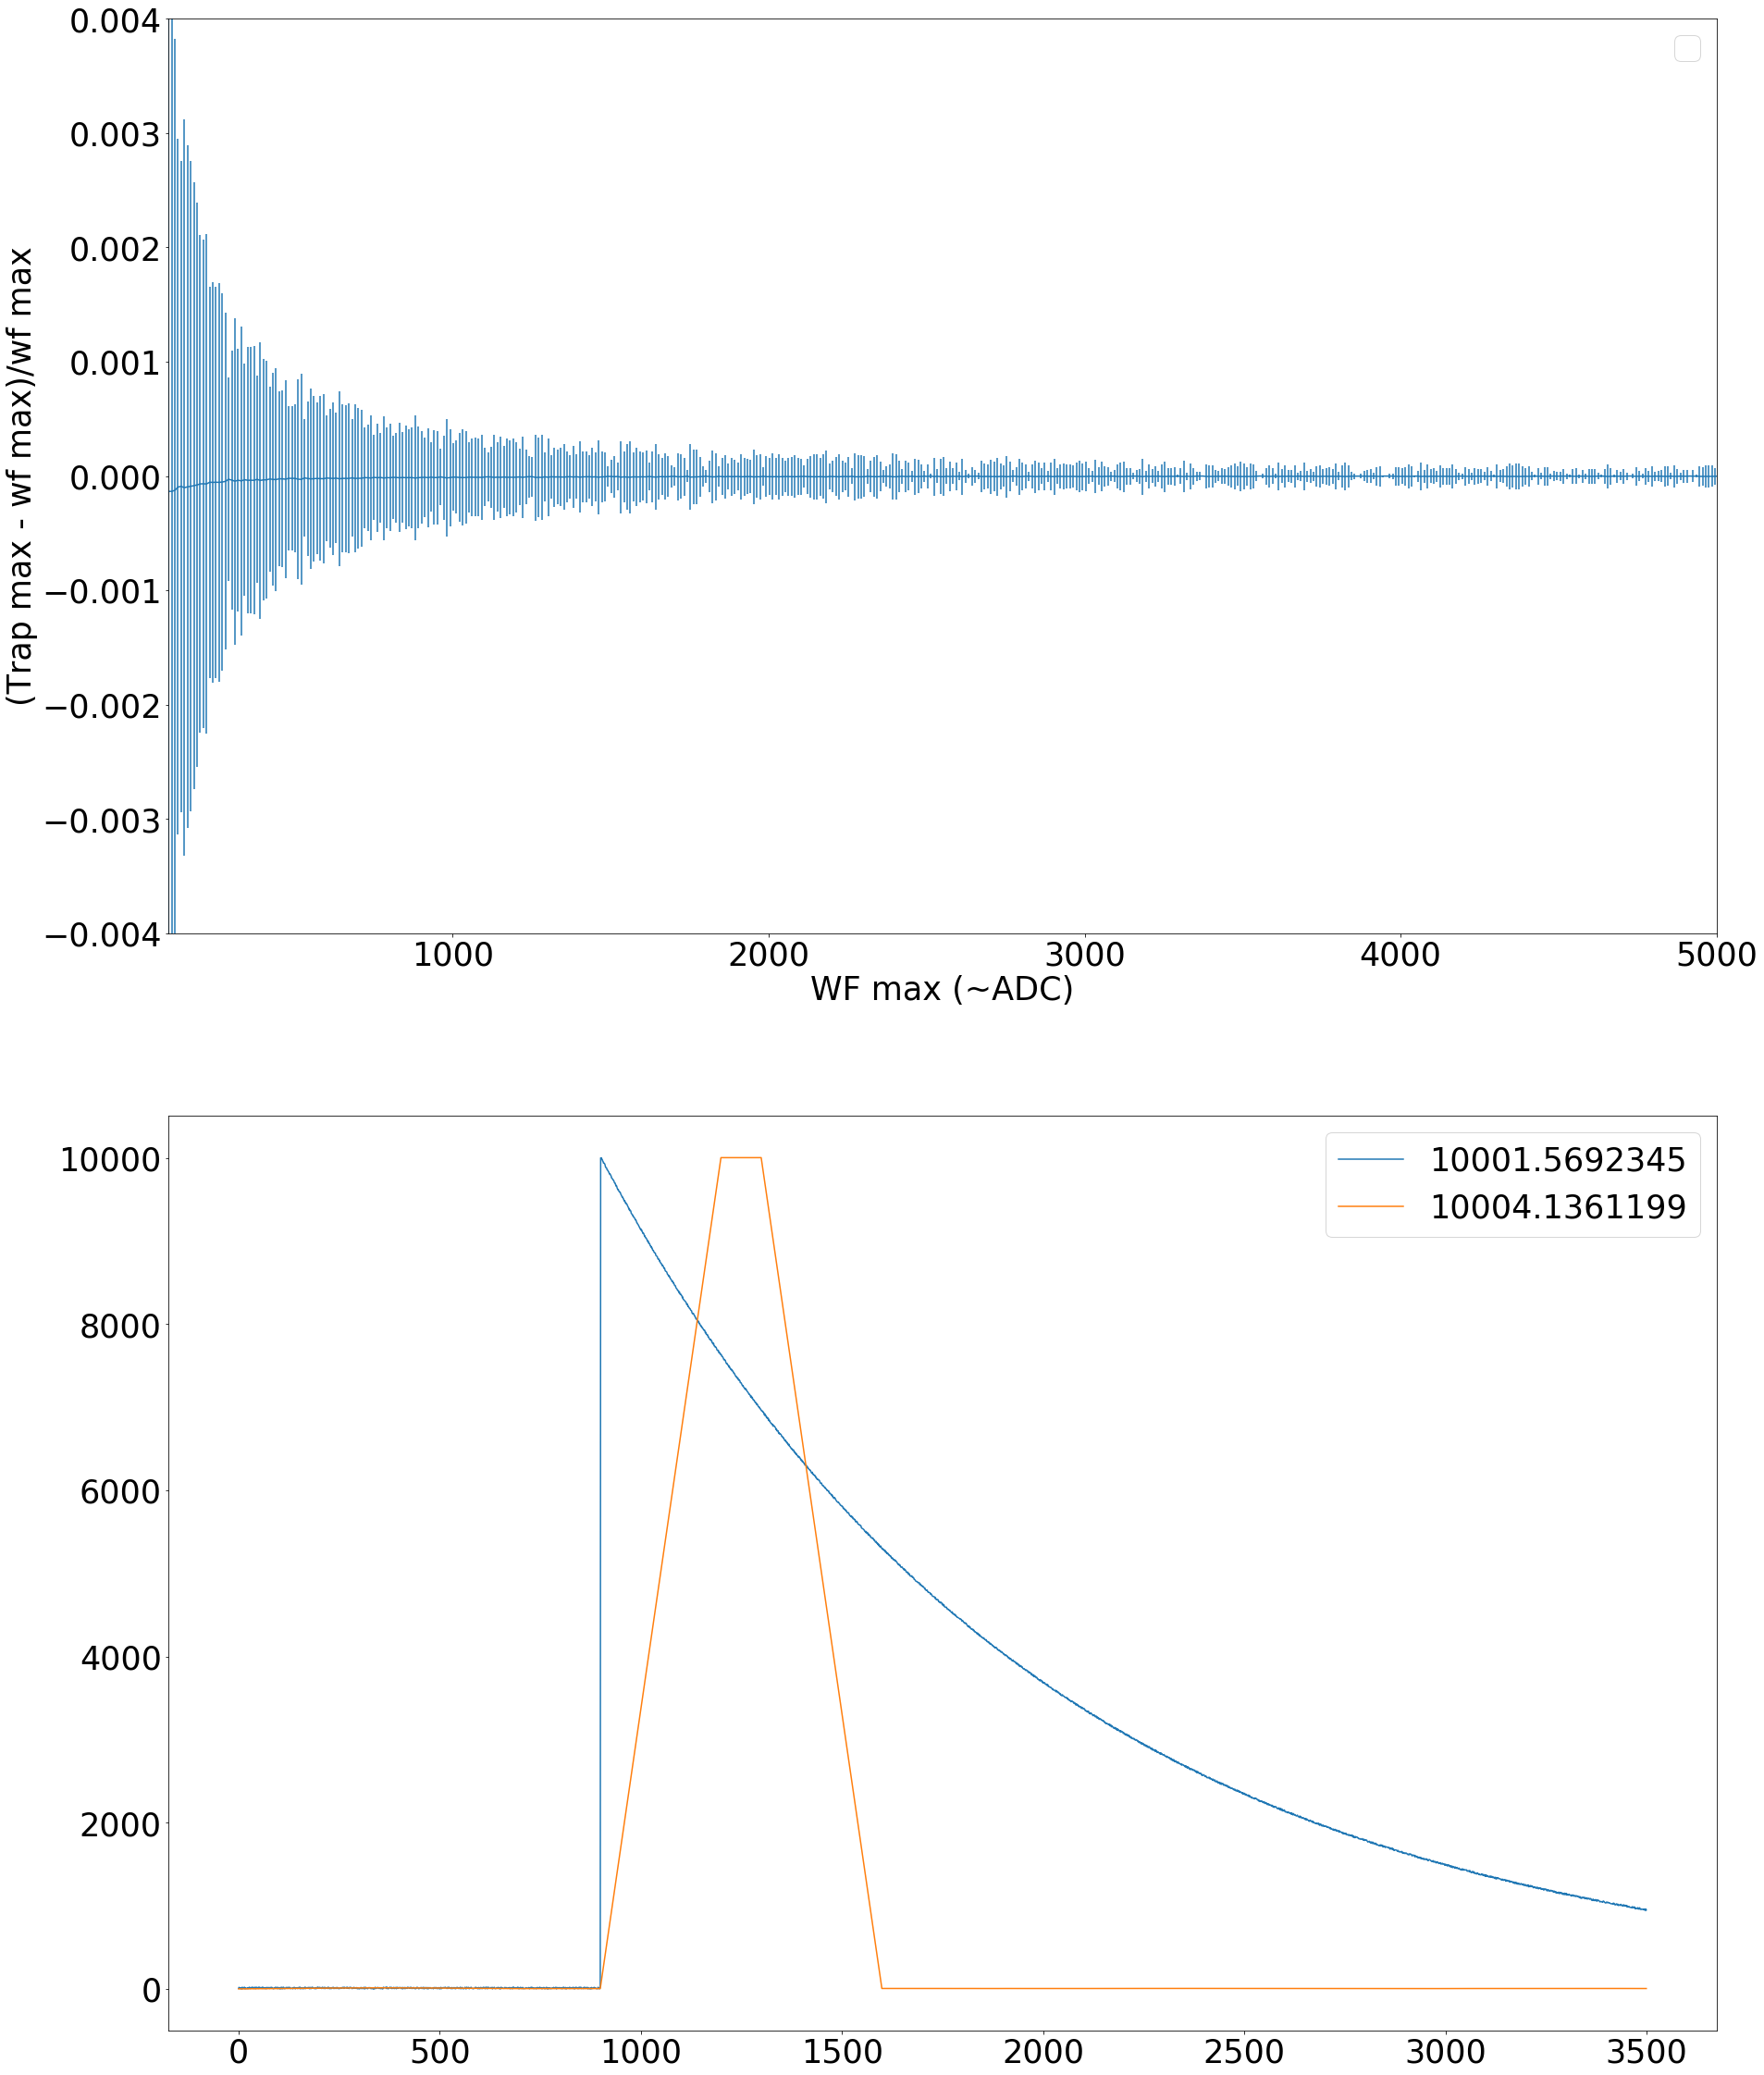

In [15]:
SIG=np.array(SIG,dtype=float)
fig,ax=subplots(nrows=2,figsize=(30,40))
ax[0].errorbar(steps,OFF/steps,SIG/steps)
ax[0].plot((50,50),(-0.1,0),'k--')
ax[0].set_xlim(100,5e3)
ax[0].set_ylim(-0.004,0.004)
ax[0].set_ylabel('(Trap max - wf max)/wf max',fontsize=fs)
ax[0].set_xlabel('WF max (~ADC)',fontsize=fs)
ax[1].plot(t,wf,label=str(max(wf)))
ax[1].plot(t,conv,label=str(max(conv)))

for i in range(2):
    ax[i].tick_params(labelsize=fs)
    ax[i].legend(fontsize=fs)
show()